In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import os
import torch

root_dir = os.getcwd()
drive = True
if drive == True:
  root_dir = os.path.join(root_dir,'drive','MyDrive','data2')

In [ ]:
os.path.join(root_dir,"archive.zip")

'/content/drive/MyDrive/data2/archive.zip'

In [ ]:
!unzip -q "/content/drive/MyDrive/data2/archive.zip" -d mydata

In [ ]:
!rm -rf mydata/leapgestrecog

In [ ]:
import torch
import numpy as np
import random

seed = 44
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

batch_size = 128
validation_split = .2
shuffle_dataset = True
random_seed= 44


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Apr  8 15:16:43 2021

@author: tosic
"""
root_dir = os.getcwd()
root_dir = os.path.join(root_dir,'mydata')
data_folder1 = os.path.join(root_dir, 'leapGestRecog','00')
data_folder2 = os.path.join(root_dir, 'leapGestRecog','01')
data_folder3 = os.path.join(root_dir, 'leapGestRecog','02')
data_folder4 = os.path.join(root_dir, 'leapGestRecog','03')
data_folder5 = os.path.join(root_dir, 'leapGestRecog','04')
data_folder6 = os.path.join(root_dir, 'leapGestRecog','05')
data_folder7 = os.path.join(root_dir, 'leapGestRecog','06')
data_folder8 = os.path.join(root_dir, 'leapGestRecog','07')
data_folder9 = os.path.join(root_dir, 'leapGestRecog','08')
data_folder10 = os.path.join(root_dir, 'leapGestRecog','09')
image_dir_arr = []
image_dir_arr.append(data_folder1)
image_dir_arr.append(data_folder2)
image_dir_arr.append(data_folder3)
image_dir_arr.append(data_folder4)
image_dir_arr.append(data_folder5)
image_dir_arr.append(data_folder6)
image_dir_arr.append(data_folder7)
image_dir_arr.append(data_folder8)
image_dir_arr.append(data_folder9)
image_dir_arr.append(data_folder10)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
print(root_dir)

cuda
/content/mydata


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Apr  8 15:14:56 2021

@author: tosic
"""

import numpy as np
import cv2 as cv
#from settings import *
import torch
import matplotlib.pyplot as plt

"""
  This file loads image names and their file paths to csv document
"""
def load_data(data_folder):
    categories = []
    data = []

    image_folders = os.listdir(data_folder)
    for c in image_folders:
        path = os.path.join(data_folder, c)
        if os.path.isdir(path):
            categories.append(c)

            files = os.listdir(path)
            for f in files:
                image_file = os.path.join(path, f)
                if os.path.isfile(image_file):
                    data.append((image_file, categories.index(c)))
    return data

import pandas as pd

data1 = load_data(data_folder1)
data2 = load_data(data_folder2)
data3 = load_data(data_folder3)
data4 = load_data(data_folder4)
data5 = load_data(data_folder5)
data6 = load_data(data_folder6)
data7 = load_data(data_folder7)
data8 = load_data(data_folder8)
data9 = load_data(data_folder9)
data10 = load_data(data_folder10)

#train data frames
df1 = pd.DataFrame(data1, columns=["image_path", "category"])
df2 = pd.DataFrame(data2, columns=["image_path", "category"])
df3 = pd.DataFrame(data3, columns=["image_path", "category"])
df4 = pd.DataFrame(data4, columns=["image_path", "category"])
df5 = pd.DataFrame(data5, columns=["image_path", "category"])
df6 = pd.DataFrame(data6, columns=["image_path", "category"])
df7 = pd.DataFrame(data7, columns=["image_path", "category"])
df8 = pd.DataFrame(data8, columns=["image_path", "category"])
df9 = pd.DataFrame(data9, columns=["image_path", "category"])
df10 = pd.DataFrame(data10, columns=["image_path", "category"])

df = df1.append(df2)
df =df.append(df3)
df =df.append(df4)
df =df.append(df5)
df =df.append(df6)
df =df.append(df7)
df =df.append(df8)
df =df.append(df9)
df =df.append(df10)

df.to_csv("Dataset.csv",index=False)

size = len(df)
print(size)

20000


In [ ]:
root_dir = os.getcwd()

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Apr  8 15:23:21 2021

@author: tosic

Description:
  This file creates custom dataset which has to contain following functions
  in order to be used by PyTorch's DataLoaders

"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
import torch
import torchvision
from torchvision.io import read_image
from torchvision import transforms
from torch.utils.data import Dataset,DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from skimage import io

class GestureDataset(Dataset):

    def __init__(self, root_dir, csv_file, transform=None,target_transform=None):
        
        self.root_dir = root_dir  
        self.data = pd.read_csv(csv_file)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):     
        """
        FUNCTION __getitem__:
            input: index
            returns: (image, label)
            This function is called from dataloader like this:
            img, label = MyCustomDataset.__getitem__(99)  # For 99th item
         """
        if torch.is_tensor(idx):
             idx = idx.tolist()

        img_name = self.data.iloc[idx, 0]
        image = io.imread(img_name)
        category = self.data.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            category = self.target_transform(category)
        sample = {'image': image, 'label': category}
        
        return sample

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 15 15:46:10 2021

@author: tosic
Description:
  This file crates transformations on input dataset
  It's goal is to calculate mean and std o be used later
  for transformations for inputs into Model

"""
from torch.utils.data import DataLoader
from torchvision import transforms

composed = transforms.Compose([
                                transforms.ToPILImage(),
                                transforms.RandomVerticalFlip(0.4),
                                transforms.RandomHorizontalFlip(0.4),
                                transforms.Resize((256, 256)),
                                transforms.ToTensor()
                              ])

dataset = GestureDataset(csv_file = os.path.join(root_dir,'Dataset.csv'),
                            root_dir = root_dir,
                            transform = composed
                         )
   

loader = torch.utils.data.DataLoader(dataset, 
                                     batch_size=10,
                                     num_workers=2,
                                     shuffle=False
                                     )
if False: # Change this to True to do calculatiion

    mean = 0.
    std = 0.
    print("Wait for calculating...")

    for i, batch in enumerate(loader): 
        images, y = batch["image"], batch["label"]
        # batch size (the last batch can have smaller size!)
        batch_samples = images.size(0) 
        images = images.view(batch_samples, images.size(1), -1)
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)

    print("Calculated")
    mean /= len(loader.dataset)
    std /= len(loader.dataset)
    print(len(loader.dataset))

    """
    Calculated
    20000
    tensor([0.0979])
    tensor([0.1987])
    """

    print(mean)
    print(std)



In [ ]:
"""
Description
This file does different transformation on input data using calculated mean and std
The result is transformed tensor
"""
root_dir = os.getcwd()

composed1 = transforms.Compose([transforms.ToPILImage(),
                                transforms.Resize((256, 256)),
                                transforms.ToTensor(),
                                transforms.Normalize(
                                mean=[0.0979],
                                std = [0.1987])])

dataset = GestureDataset(csv_file = os.path.join(root_dir,'Dataset.csv'),
                         root_dir = root_dir,
                         transform = composed1,
                         target_transform  = None
                        )

# Creating data indices for training and validation splits

dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))

if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating data samplers and loaders:
# Every DataLoader has a sampler internally which is either
# SequentialSampler or RandomSampler depending on the value of shuffle, 
# And these are iterated over to get the indices of the Dataset to use.

train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = DataLoader(dataset,
                          batch_size=batch_size, 
                          sampler=train_sampler,
                          num_workers = 2)
validation_loader = DataLoader(dataset,
                               batch_size=batch_size,
                               sampler=valid_sampler,
                               num_workers = 2)

# Print one image sample
if False:
    print("image after normalization")
    idx = 8
    img = dataset.__getitem__(idx)['image']
    label = dataset.__getitem__(idx)['label']
    print(f"Tensor size {img.shape} tensor label {label}")

Image after normalization
Label : 0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


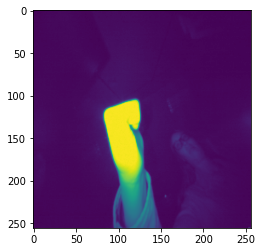

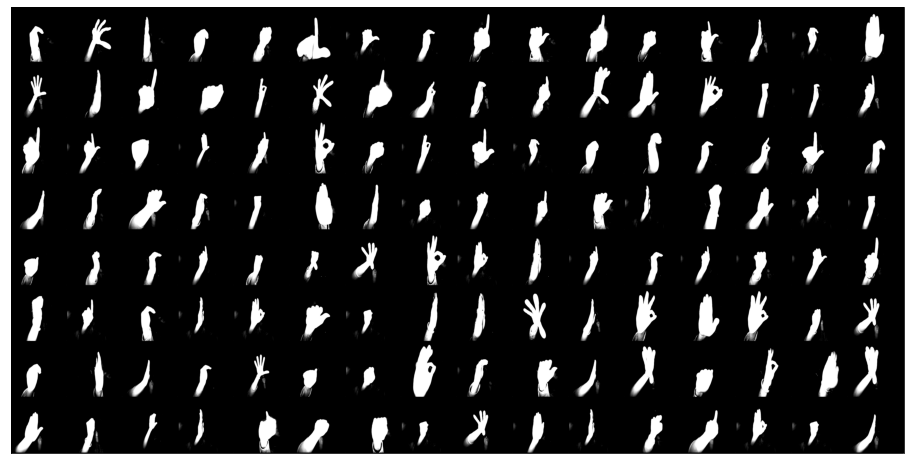

In [ ]:
from torchvision.utils import make_grid
def display_img(img,label):
    print("Image after normalization")
    print(f"Label : {label}")
    plt.imshow(img[0,:,:])

def show_batch(dl):
    """Plot images grid of single batch"""
    for i, batch in enumerate(dl):
        x, y = batch["image"], batch["label"]
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(x,nrow=16).permute(1,2,0))
        break
idx = 8
img = dataset.__getitem__(idx)['image']
label = dataset.__getitem__(idx)['label']
display_img(img,label)
show_batch(train_loader)

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 16 11:38:02 2021

@author: tosic
     CNN Architecture will be:
      conv->batch_norm->ReLU->pool->(x5)->fc1->fc2->fc3
      with dropout layers placed in middle layers of convnet
"""
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import lr_scheduler

class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet,self).__init__()
        # Calculate conv output: (input - filter +2Padding)/Stride +1
        self.model = nn.Sequential(
             nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 5, stride = 1),
             nn.BatchNorm2d(6),
             nn.ReLU(inplace=True),
             nn.MaxPool2d(kernel_size=2, stride=2),
             
             nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 3, stride = 1),
             nn.Dropout2d(p=0.5),
             nn.BatchNorm2d(16),
             nn.ReLU(inplace=True),
             nn.MaxPool2d(kernel_size=2, stride=2),
             
             nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3, stride = 1),
             nn.Dropout2d(p=0.7),
             nn.BatchNorm2d(32),
             nn.ReLU(inplace=True),
             nn.MaxPool2d(kernel_size=2, stride=2),
             
             nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 1),
             nn.Dropout2d(p=0.6),
             nn.BatchNorm2d(64),
             nn.ReLU(inplace=True),
             nn.MaxPool2d(kernel_size=2, stride=2),
             
             nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, stride = 1),
             nn.Dropout2d(p=0.5),
             nn.BatchNorm2d(128),
             nn.ReLU(inplace=True),
             nn.MaxPool2d(kernel_size=2, stride=2),

             nn.Flatten(),
             nn.Linear(6*6*128, 256),
             nn.Dropout2d(p=0.4),
             nn.ReLU(inplace=True),
             nn.Linear(256, 128),
             nn.Dropout2d(p=0.3),
             nn.ReLU(inplace=True),
             nn.Linear(128, 64),
             nn.ReLU(inplace=True),
             nn.Linear(64, 26),
             nn.ReLU(inplace=True),
             nn.Linear(26, 10)
        )
        
    def forward(self,x):        
        x = self.model(x)
        return x
        #no Softmax bc it's already included in CELoss!

In [ ]:
def accuracy(out, labels):
    _,pred = torch.max(out, dim=1)
    return torch.sum(pred==labels).item()

In [ ]:
import time
"""
This file is used for training neural network
Some initial settings are given at the beginnig:
  We are using CrossEntropyLoss which inclues Softmax in pytorc's implementation
  We tested that with learning rate is 0.001 and epoch number 14 we get 98.9% accuracy on training datset
  The learning curve is being plotted later
  We achieved the test set accuracy of 97.4%
"""
net = ConvNet().to(device)
num_epochs = 14 
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

train_loss = []
train_acc = []
total_step = len(train_loader)
net.train()

start = time.time()

for epoch in range(1, num_epochs+1):

    running_loss = 0.0
    correct = 0
    total=0
    print(f'Epoch {epoch}\n')

    for i, batch in enumerate(train_loader): #gives us data and index

        # we have to reshape this samples of images 
        data_ = batch["image"].to(device)
        target_ = batch["label"].to(device)
        optimizer.zero_grad()
        
        # TRAIN
        outputs = net(data_)
        loss = criterion(outputs, target_)
        loss.backward()
        optimizer.step()

        # PRINT LOSS
        running_loss += loss.item()
        _,pred = torch.max(outputs, dim=1)
        correct += torch.sum(pred==target_).item()
        total += target_.size(0)
        if (i) % 20 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Step [{i}/{total_step}], Loss: {loss.item():.4f}')

    scheduler.step()
    train_acc.append(100 * correct / total)
    train_loss.append(running_loss/total_step)
    print(f'\ntrain-loss: {np.mean(train_loss):.4f}, train-acc: {(100 * correct/total):.4f}')
end = time.time()
print(f'Training time: {end - start} seconds')

Epoch 1



/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch [1/14], Step [0/125], Loss: 2.3150
Epoch [1/14], Step [20/125], Loss: 2.1640
Epoch [1/14], Step [40/125], Loss: 1.6359
Epoch [1/14], Step [60/125], Loss: 1.3718
Epoch [1/14], Step [80/125], Loss: 1.2239
Epoch [1/14], Step [100/125], Loss: 1.0779
Epoch [1/14], Step [120/125], Loss: 0.7435

train-loss: 1.5263, train-acc: 46.3188
Epoch 2

Epoch [2/14], Step [0/125], Loss: 0.7369
Epoch [2/14], Step [20/125], Loss: 0.7088
Epoch [2/14], Step [40/125], Loss: 0.6876
Epoch [2/14], Step [60/125], Loss: 0.6747
Epoch [2/14], Step [80/125], Loss: 0.4370
Epoch [2/14], Step [100/125], Loss: 0.3365
Epoch [2/14], Step [120/125], Loss: 0.4430

train-loss: 1.0505, train-acc: 79.6437
Epoch 3

Epoch [3/14], Step [0/125], Loss: 0.4068
Epoch [3/14], Step [20/125], Loss: 0.4056
Epoch [3/14], Step [40/125], Loss: 0.2619
Epoch [3/14], Step [60/125], Loss: 0.4117
Epoch [3/14], Step [80/125], Loss: 0.1935
Epoch [3/14], Step [100/125], Loss: 0.2704
Epoch [3/14], Step [120/125], Loss: 0.4871

train-loss: 0.81

In [ ]:
    # Save model:
    FILE = "model.pth"
    torch.save(net,FILE)

    #Save model parameters
    torch.save(net.state_dict(),"my_model_state_dict.pt")

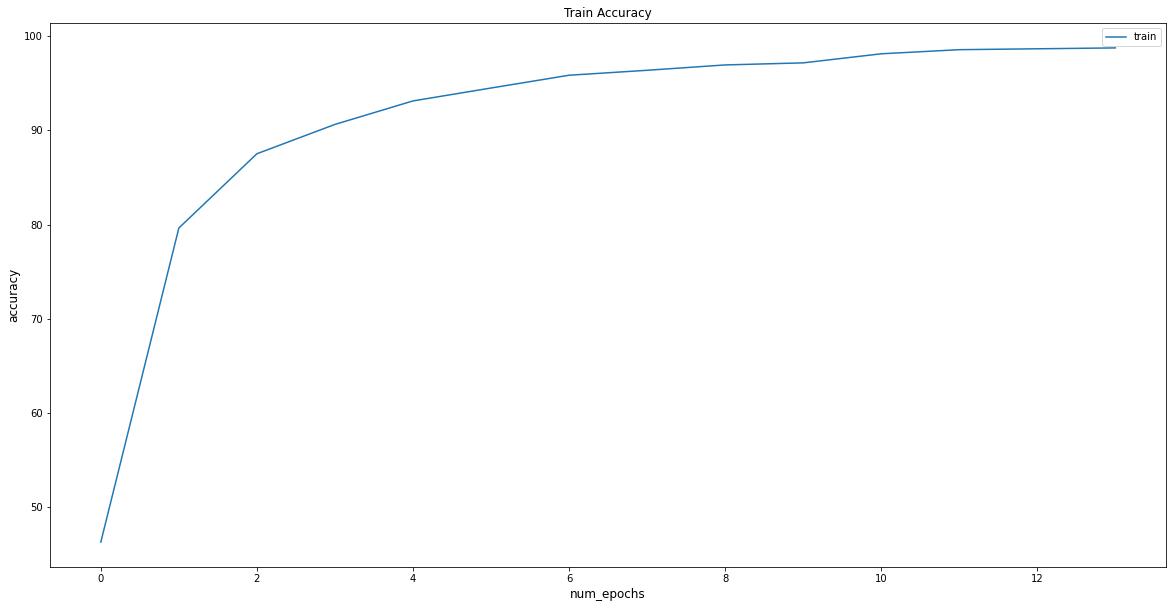

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.title("Train Accuracy")
plt.plot(train_acc, label='train')
plt.xlabel('num_epochs', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.legend(loc='best')

In [ ]:
""" 
TEST LOOP 
In this file the evaluation is being done.
  Evaluation must be performed on a held out dataset that has not been used prior,
  either for training the model or tuning the model parameters.
  set the model to eval mode:
"""
import time
start = time.time()
net.eval()
test_loss = 0
correct = 0
# turn off gradients for validation
with torch.no_grad():
  for i, batch in enumerate(validation_loader):
        data = batch["image"].to(device)
        target = batch["label"].to(device)
        # forward pass
        output = net(data)
        # test loss
        loss = criterion(output, target)
        # accumulate the test_loss
        test_loss += loss.item()
        # calculate corrects and total for plotting
        _,pred = torch.max(output, dim=1)
        correct += torch.sum(pred==target).item()
        total += target.size(0)

test_loss = test_loss / (len(validation_loader)*batch_size)
accuracy = correct / (len(validation_loader)*batch_size)
print(f'Test Accuracy: {accuracy*100:.4f}, test loss: {test_loss:.10f}')
end = time.time()
print(f'Testing time: {end - start} seconds')

Test Accuracy: 97.4854, test loss: 0.0000532628
Testing time: 10.31925654411316 seconds
